In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import keras
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

plt.rcParams['figure.dpi']= 150
sns.set(style="whitegrid")
tf.test.is_gpu_available()

True

In [33]:
# Read cleaned training data
data = pd.read_csv("drive/My Drive/Colab Notebooks/cleaned_train_data.csv")

# It is better to choose random_state=42
# Split training data into 70% training data and 20% validation data, 10% test data
train, testValidation = train_test_split(data, test_size=0.3, random_state=42, shuffle=True)
test, validation = train_test_split(testValidation, test_size=0.66, random_state=42, shuffle=True)
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
print("train.shape: ", train.shape)
print("test.shape: ", test.shape)

X_train = train.comment_text
X_validation = validation.comment_text
Y_train = train[categories]
Y_validation = validation[categories]

train.shape:  (111699, 8)
test.shape:  (16276, 8)


In [34]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
54568,91da4b4b95fe5e2d,conflict of interest note by your user name it...,0,0,0,0,0,0
3786,0a1df25805d6d2e7,update actually i changed this to something bl...,0,0,0,0,0,0
22938,3c9e75d2b8dcf720,mica article sniper thanks for your comments o...,0,0,0,0,0,0
137856,e1b03f4baf9d58ce,arguing that bart and cal train should get mor...,0,0,0,0,0,0
143038,fcdf5d299437f2a9,blocked i i blocked you for hours for being un...,0,0,0,0,0,0


In [35]:
validation.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
78198,d1502b14889b8405,the page is only about mind old expansion and ...,0,0,0,0,0,0
155782,c39dc4fd8a8feeea,okay that fair lets proceed at a without the i...,0,0,0,0,0,0
58845,9d99254e1f6d5078,rent a car hyderabad hours service cont us for...,0,0,0,0,0,0
51383,8976356d2888b47e,us sure two admins to convince is what have al...,0,0,0,0,0,0
149052,5662d02dba405e28,leave my damn user page talk page alone stop m...,1,0,0,0,0,0


In [36]:
tfidfVec = TfidfVectorizer(stop_words="english")
X_train_tfidf = tfidfVec.fit_transform(X_train)
X_validation_tfidf = tfidfVec.transform(X_validation)
print(X_train_tfidf.shape)
print(X_validation_tfidf.shape)

(111699, 54351)
(31596, 54351)


In [37]:
model = keras.Sequential()
model.add(keras.layers.Dense(30, activation=tf.nn.relu, input_dim = X_train_tfidf.shape[1]))
model.add(keras.layers.Dense(6, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 30)                1630560   
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 186       
Total params: 1,630,746
Trainable params: 1,630,746
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [39]:
history = model.fit(X_train_tfidf, Y_train, epochs=20, batch_size=512, validation_data=(X_validation_tfidf, Y_validation), verbose=1)

Train on 111699 samples, validate on 31596 samples
Epoch 1/20
111699/111699 [==============================] - 64s 574us/step - loss: 0.3689 - acc: 0.9516 - val_loss: 0.1373 - val_acc: 0.9678
Epoch 2/20
111699/111699 [==============================] - 103s 922us/step - loss: 0.0987 - acc: 0.9739 - val_loss: 0.0808 - val_acc: 0.9769
Epoch 3/20
111699/111699 [==============================] - 111s 992us/step - loss: 0.0674 - acc: 0.9797 - val_loss: 0.0671 - val_acc: 0.9792
Epoch 4/20
111699/111699 [==============================] - 106s 953us/step - loss: 0.0558 - acc: 0.9818 - val_loss: 0.0616 - val_acc: 0.9802
Epoch 5/20
111699/111699 [==============================] - 106s 953us/step - loss: 0.0490 - acc: 0.9832 - val_loss: 0.0590 - val_acc: 0.9805
Epoch 6/20
111699/111699 [==============================] - 108s 964us/step - loss: 0.0439 - acc: 0.9845 - val_loss: 0.0577 - val_acc: 0.9808
Epoch 7/20
111699/111699 [==============================] - 105s 936us/step - loss: 0.0400 - acc: 

In [0]:
import matplotlib.pyplot as plt
# plt.style.use('ggplot')

def plotTrainingProcess(history):
    # get parameter
    trainAcc, valAcc, trainLoss, valLoss  = history.history['acc'], history.history['val_acc'], history.history['loss'], history.history['val_loss']
    X_axis = range(1, len(trainAcc) + 1)

    # plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(X_axis, trainAcc, 'b', label='Training accuracy')
    plt.plot(X_axis, valAcc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    # plot loss
    plt.subplot(1, 2, 2)
    plt.plot(X_axis, trainLoss, 'b', label='Training loss')
    plt.plot(X_axis, valLoss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

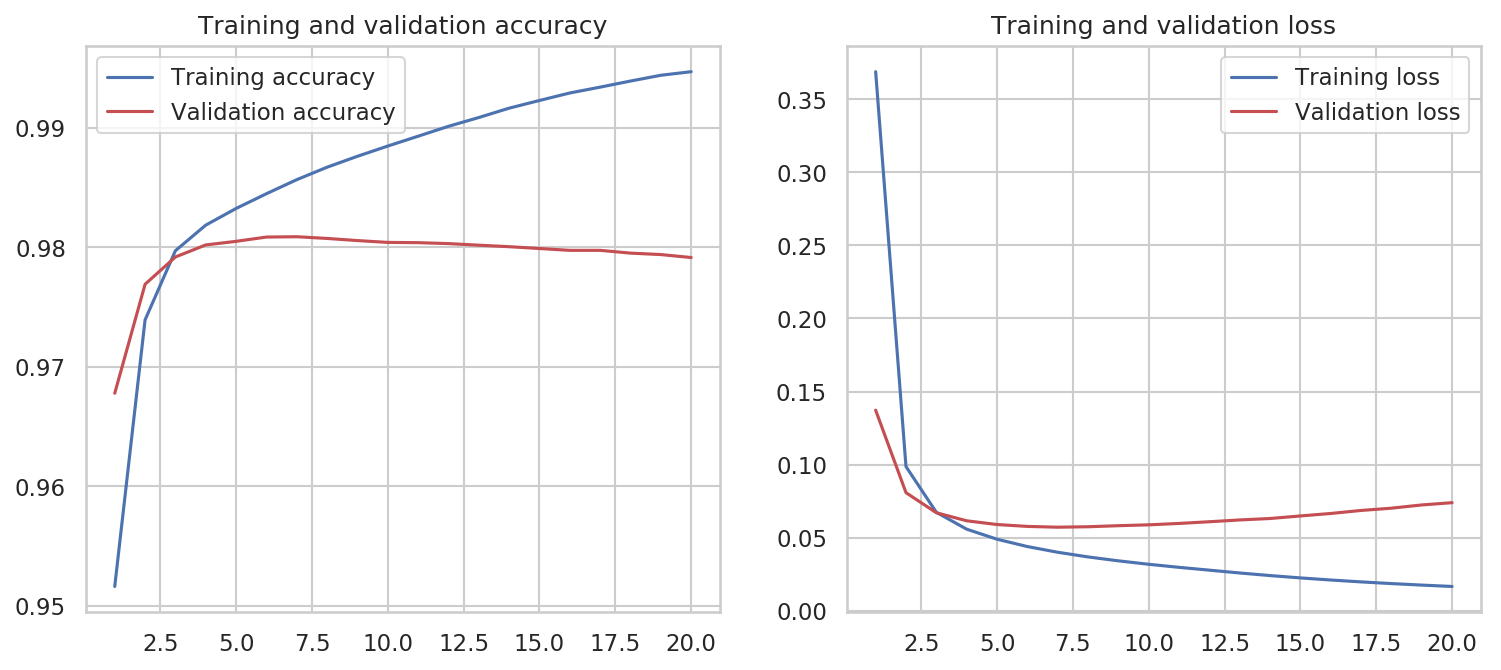

In [41]:
plotTrainingProcess(history)